# 짝지은 표본 t-검정 = 대응표본 t-검정

## 직접 계산

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import t

In [ ]:
# x1 = 사전테스트
# x2 = 사후테스트
x1 = pd.Series([3, 5, 4, 6, 5, 5, 4, 5, 3, 6, 7, 8, 7, 6, 7, 8, 8, 9, 9, 8, 7, 7, 6, 7, 8])
x2 = pd.Series([7, 8, 6, 7, 8, 9, 6, 6, 7, 8, 8, 7, 9, 10, 9, 9, 8, 8, 4, 4, 5, 6, 9, 8, 12])

In [ ]:
print(x1.mean())
print(x2.mean())

6.32
7.52


In [ ]:
# 효과가 있는지 알아보는 문제이므로 사후 테스트 평균이 사전 테스트 평균보다 커야함
# 즉, 단측 검정

In [ ]:
# 차이평균, 차이표준편차, 표본크기
d = x2 - x1;d

0     4
1     3
2     2
3     1
4     3
5     4
6     2
7     1
8     4
9     2
10    1
11   -1
12    2
13    4
14    2
15    1
16    0
17   -1
18   -5
19   -4
20   -2
21   -1
22    3
23    1
24    4
dtype: int64

In [ ]:
d_m = d.mean();d_m

1.2

In [ ]:
d_sd = d.std();d_sd

2.449489742783178

In [ ]:
n = len(d);n

25

In [ ]:
# 검정통계량
# 분자	차이평균
d_m

1.2

In [ ]:
# 분모	표준오차 = 차이표준편차/제곱근(표본크기)
d_sd/np.sqrt(n)

0.4898979485566356

In [ ]:
# 분자/분모
tv = d_m/(d_sd/np.sqrt(n));tv

2.4494897427831783

In [ ]:
# 임계값, 유의수준, 자유도, 단측검정
alpha = 0.05
df = n - 1
cv = t.ppf(1 - alpha, df);cv

1.7108820799094275

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수가 사전 점수보다 유의하게 높다

True

In [ ]:
# 유의확률
pv = 1 - t.cdf(tv, df);pv

0.010991498522051169

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수가 사전 점수보다 유의하게 높다

True

In [ ]:
# 임계값, 유의수준, 자유도, 양측검정
alpha = 0.05
df = n - 1
cv = t.ppf(1 - alpha/2, df);cv

2.0638985616280205

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수와 사전 점수의 차이가 있다

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df))*2;pv

0.021982997044102337

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수와 사전 점수의 차이가 있다

True

## 함수 이용

In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import t

In [ ]:
# x1 = 사전테스트
# x2 = 사후테스트
x1 = pd.Series([3, 5, 4, 6, 5, 5, 4, 5, 3, 6, 7, 8, 7, 6, 7, 8, 8, 9, 9, 8, 7, 7, 6, 7, 8])
x2 = pd.Series([7, 8, 6, 7, 8, 9, 6, 6, 7, 8, 8, 7, 9, 10, 9, 9, 8, 8, 4, 4, 5, 6, 9, 8, 12])

In [ ]:
# 차이
d = x2 - x1;d

0     4
1     3
2     2
3     1
4     3
5     4
6     2
7     1
8     4
9     2
10    1
11   -1
12    2
13    4
14    2
15    1
16    0
17   -1
18   -5
19   -4
20   -2
21   -1
22    3
23    1
24    4
dtype: int64

In [ ]:
# 정규성 검정
shapiro(d)
# 유의확률이 0.05 보다 작은지 큰지 확인
# 0.05 보다 작으면 귀무가설 기각 = 정규성을 가지지 않음
# 0.05 보다 크면 귀무가설 채택 = 정규성을 가짐

ShapiroResult(statistic=0.9015383720397949, pvalue=0.01982017047703266)

#### 정규성 가지는 경우
- t-test

In [ ]:
# 단측검정
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
from scipy.stats import ttest_rel
# ttest_rel(x2, x1, alternative = 'less')
ttest_rel(x2, x1, alternative = 'greater')

TtestResult(statistic=2.4494897427831783, pvalue=0.01099149852205115, df=24)

In [ ]:
# 단측검정
# u전 > u후 => 'greater'
# u전 < u후 => 'less'
from scipy.stats import ttest_rel
ttest_rel(x1, x2, alternative = 'less')
# ttest_rel(x1, x2, alternative = 'greater')

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하다.

TtestResult(statistic=-2.4494897427831783, pvalue=0.01099149852205115, df=24)

In [ ]:
tv, pv = ttest_rel(x1, x2, alternative = 'less')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.01099149852205115


In [ ]:
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
tv, pv = ttest_rel(x2, x1, alternative = 'greater')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.01099149852205115


In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x2, x1)
# ttest_rel(x2, x1, alternative = 'two-sided')

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하다.

TtestResult(statistic=2.4494897427831783, pvalue=0.0219829970441023, df=24)

In [ ]:
# 양측검정 - 전 후 바꿔도 같음
from scipy.stats import ttest_rel
ttest_rel(x1, x2)
# ttest_rel(x1, x2, alternative = 'two-sided')

TtestResult(statistic=-2.4494897427831783, pvalue=0.0219829970441023, df=24)

In [ ]:
tv, pv = ttest_rel(x2, x1)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.0219829970441023


In [ ]:
# 전 후 바꿔도 같음
tv, pv = ttest_rel(x1, x2)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.0219829970441023


#### 정규성 가지지 않는 경우

In [ ]:
# 비모수 통계
# Wilcoxon Signed-Rank test
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
stats.wilcoxon(x2 - x1, alternative="greater")
# stats.wilcoxon(d, alternative="greater")
# 0.05 보다 작으면 귀무가설 기각 = 차이가 있음
# 0.05 보다 크면 귀무가설 채택 = 차이가 없음

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하지 않다.

WilcoxonResult(statistic=18.0, pvalue=0.8388671875)

In [ ]:
# 윌콕슨 부호 순위 검정

# 문제 풀이

In [ ]:
# 1	독립 평균 검증 = 독립표본 t검정
# 	1) 서로 다른 사람으로 구성된 두 그룹
# 	2) 한 번만 측정
# 	3) 두 그룹의 평균 차이를 검정
# 	종속 평균 검증 = 짝지은 표본 t검정
# 	1) 같은 사람으로 구성된 한 그룹
# 	2) 두 번 측정
# 	3) 두 번 측정한 차이값 평균과 모집단 평균 차이값의 차이를 검정

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import t

In [ ]:
# 문제2
# x1 = 재활용 전
# x2 = 재활용 후
x1 = pd.Series([20, 6, 12, 34, 55, 43, 54, 24, 33, 21, 34, 33, 54, 23, 33, 44, 65, 43, 53, 22, 34, 32, 44, 17, 28])
x2 = pd.Series([23, 8, 11, 35, 57, 76, 54, 26, 35, 26, 28, 31, 56, 22, 35, 41, 56, 34, 51, 21, 31, 33, 38, 15, 27])

In [ ]:
# 차이평균, 차이표준편차, 표본크기
d = x2 - x1;d

0      3
1      2
2     -1
3      1
4      2
5     33
6      0
7      2
8      2
9      5
10    -6
11    -2
12     2
13    -1
14     2
15    -3
16    -9
17    -9
18    -2
19    -1
20    -3
21     1
22    -6
23    -2
24    -1
dtype: int64

In [ ]:
d_m = d.mean();d_m

0.36

In [ ]:
d_sd = d.std();d_sd

7.675067860720625

In [ ]:
n = len(d);n

25

In [ ]:
# 검정통계량
# 분자	차이평균
d_m

0.36

In [ ]:
# 분모	표준오차 = 차이표준편차/제곱근(표본크기)
d_sd/np.sqrt(n)

1.535013572144125

In [ ]:
# 분자/분모
tv = d_m/(d_sd/np.sqrt(n));tv

0.2345256136707298

In [ ]:
# 임계값, 유의수준, 자유도, 양측검정
alpha = 0.01
df = n - 1
cv = t.ppf(1 - alpha/2, df);cv

2.796939504772804

In [ ]:
# 결론
cv < tv
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# = 통계적으로 유의한 차이가 없다
# 종이의 양에 변화가 없다

False

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df))*2;pv

0.816566228005847

In [ ]:
# 결론
alpha > pv
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# = 통계적으로 유의한 차이가 없다
# 종이의 양에 변화가 없다

False

In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x1, x2)
# ttest_rel(x1, x2, alternative = 'two-sided')

TtestResult(statistic=-0.2345256136707298, pvalue=0.8165662280058471, df=24)

In [ ]:
tv, pv = ttest_rel(x1, x2)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  0.2345256136707298
유의확률:  0.8165662280058471


In [ ]:
# 3	1) 독립표본 t검정
# 	2) 독립표본 t검정
# 	3) 짝지은표본 t검정
# 	4) 짝지은표본 t검정
# 	5) 짝지은표본 t검정
# 4	독립표본은 서로 다른 사람, 두 집단의 차이 검정
# 	짝지은 표본은 같은 사람, 두 번 측정한 표본의 차이값으로 검정
# 	두 집단을 비교하는 것보다 한 집단을 비교하는 것이 더 정확함
# 	더 정확하다는 것은 오류가 발생할 확률이 더 작다 = 유의수준이 더 작다
# 	오른쪽으로 이동한 것 = 임계값이 더 커진 것이기 때문에 더 엄격하다고 할 수 있다

In [ ]:
# 문제5
# x1: 서비스제공전
# x2: 서비스제공후
x1 = pd.Series([1.3, 2.5, 2.3, 8.1, 5.0, 7.0, 7.5, 5.2, 4.4, 7.6, 9.0, 7.6, 4.5, 1.1, 5.6, 6.2, 7.0, 6.9, 5.6, 5.2])
x2 = pd.Series([6.5, 8.7, 9.8, 10.2, 7.9, 6.5, 8.7, 7.9, 8.7, 9.1, 8.4, 6.4, 7.2, 5.8, 6.9, 5.9, 7.6, 7.8, 7.3, 4.6])

In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x1, x2)
# ttest_rel(x1, x2, alternative = 'two-sided')

TtestResult(statistic=-3.892546470965022, pvalue=0.0009793404470821794, df=19)

In [ ]:
tv, pv = ttest_rel(x1, x2)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)
# 공공서비스 센터에 대한 가족의 만족도 수준에 유의한 변화가 있었다.

검정통계량:  3.892546470965022
유의확률:  0.0009793404470821794


In [ ]:
pv = ttest_rel(x1, x2)[1]

In [ ]:
# 임계값, 유의수준, 자유도, 양측검정
alpha = 0.05

In [ ]:
alpha > pv
# 공공서비스 센터에 대한 가족의 만족도 수준에 유의한 변화가 있었다.

True

In [ ]:
tv = ttest_rel(x1, x2)[0];tv = abs(tv)

In [ ]:
d = x2 - x1

In [ ]:
n = len(d);n

20

In [ ]:
df = n - 1
cv = t.ppf(1 - alpha/2, df);cv

2.093024054408263

In [ ]:
cv < tv
# 공공서비스 센터에 대한 가족의 만족도 수준에 유의한 변화가 있었다.

True

In [ ]:
# 문제6
# x1: 훈련전
# x2: 훈련후
x1 = pd.Series([58676, 46567, 87656, 65431, 56543, 45456, 67656, 78887, 65454, 56554, 58876, 54433])
x2 = pd.Series([87890, 87876, 56768, 98980, 98784, 65414, 99878, 67578, 76599, 88767, 78778, 98898])

In [ ]:
# 단측검정
# u전 > u후 => 'greater'
# u전 < u후 => 'less'
from scipy.stats import ttest_rel
ttest_rel(x1, x2, alternative = 'less')

TtestResult(statistic=-3.343925490943577, pvalue=0.0032738336967816145, df=11)

In [ ]:
tv, pv = ttest_rel(x1, x2, alternative = 'less')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)
# 훈련이 유의한 효과가 있었다.

검정통계량:  3.343925490943577
유의확률:  0.0032738336967816145


In [ ]:
# 문제7
# x1: 상담전
# x2: 상담후
x1 = pd.Series([45, 46, 32, 34, 33, 21, 23, 41, 27, 38, 41, 47, 41, 32, 22, 34, 36, 19, 23, 22])
x2 = pd.Series([46, 44, 47, 42, 45, 32, 36, 43, 24, 41, 38, 31, 22, 36, 36, 27, 41, 44, 32, 32])

In [ ]:
# 단측검정
# u전 > u후 => 'greater'
# u전 < u후 => 'less'
from scipy.stats import ttest_rel
ttest_rel(x1, x2, alternative = 'less')

TtestResult(statistic=-1.731021356775071, pvalue=0.049827819425277774, df=19)

In [ ]:
tv, pv = ttest_rel(x1, x2, alternative = 'less')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)
# 상담하는 것이 관용적 태도 함양에 유의한 긍정적 영향을 미친다.

검정통계량:  1.731021356775071
유의확률:  0.049827819425277774


In [ ]:
# 문제8
# x1: 시즌첫경기
# x2: 시즌마지막경기
x1 = pd.Series([252, 188, 196, 274, 289, 272, 110, 283, 265, 264])
x2 = pd.Series([289, 254, 193, 102, 227, 202, 150, 244, 260, 254])

In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x1, x2)
# ttest_rel(x1, x2, alternative = 'two-sided')

TtestResult(statistic=1.0025346441468546, pvalue=0.34227633817569986, df=9)

In [ ]:
tv, pv = ttest_rel(x1, x2)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)
# 시즌 전과 후에 팀의 성과에는 차이가 없다.

검정통계량:  1.0025346441468546
유의확률:  0.34227633817569986


# 분산분석

## 직접 계산

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import f

In [ ]:
# x1: 집단1(주당5시간)
# x2: 집단2(주당10시간)
# x3: 집단3(주당20시간)
# 언어발달시험점수
x1 = [87, 86, 76, 56, 78, 98, 77, 66, 75, 67]
x2 = [87, 85, 99, 85, 79, 81, 82, 78, 85, 91]
x3 = [89, 91, 96, 87, 89, 90, 89, 96, 96, 93]

In [ ]:
# 그룹평균
x1_m = np.mean(x1);x2_m = np.mean(x2);x3_m = np.mean(x3)
print(x1_m, x2_m, x3_m)

76.6 85.2 91.6


In [ ]:
# 총평균
t_m = np.mean(x1 + x2 + x3);t_m

84.46666666666667

In [ ]:
# 표본크기
n1 = len(x1);n2 = len(x2);n3 = len(x3)
print(n1, n2, n3)

10 10 10


In [ ]:
# 분산분석표
# between
# 그룹간 변동 = 그룹평균 - 총평균
b1 = x1_m - t_m
b2 = x2_m - t_m
b3 = x3_m - t_m
print(b1, b2, b3)

-7.866666666666674 0.7333333333333343 7.133333333333326


In [ ]:
# 그룹간 변동 제곱
b12 = b1 ** 2
b22 = b2 ** 2
b32 = b3 ** 2
print(b12, b22, b32)

61.88444444444456 0.5377777777777791 50.884444444444334


In [ ]:
# 그룹간 변동 제곱합 = SSB
ssb = sum([b12*n1, b22*n2, b32*n3]);ssb

1133.0666666666666

In [ ]:
# within
# 그룹내 변동 = 관측치 - 그룹평균
w1 = x1 - x1_m
w2 = x2 - x2_m
w3 = x3 - x3_m
print(w1, w2, w3)

[ 10.4   9.4  -0.6 -20.6   1.4  21.4   0.4 -10.6  -1.6  -9.6] [ 1.8 -0.2 13.8 -0.2 -6.2 -4.2 -3.2 -7.2 -0.2  5.8] [-2.6 -0.6  4.4 -4.6 -2.6 -1.6 -2.6  4.4  4.4  1.4]


In [ ]:
# 그룹내 변동 제곱
w12 = w1 ** 2
w22 = w2 ** 2
w32 = w3 ** 2
print(w12, w22, w32)

[1.0816e+02 8.8360e+01 3.6000e-01 4.2436e+02 1.9600e+00 4.5796e+02
 1.6000e-01 1.1236e+02 2.5600e+00 9.2160e+01] [3.2400e+00 4.0000e-02 1.9044e+02 4.0000e-02 3.8440e+01 1.7640e+01
 1.0240e+01 5.1840e+01 4.0000e-02 3.3640e+01] [ 6.76  0.36 19.36 21.16  6.76  2.56  6.76 19.36 19.36  1.96]


In [ ]:
# 그룹내 변동 제곱합 = SSW
ssw = sum(w12 + w22 + w32);ssw

1738.4

In [ ]:
# 자유도
# between => k - 1
# 분자 자유도 = df1
k = 3;df1 = k -1;df1

2

In [ ]:
# within => n - k
# 분모 자유도 = df2
n = n1 + n2 + n3;df2 = n - k;df2

27

In [ ]:
# 총 제곱합 SST = SSB + SSW
sst = ssb + ssw;sst

2871.4666666666667

In [ ]:
# 전체 자유도 n - 1 = k - 1 + n - k
n - 1
k - 1 + n - k

29

In [ ]:
# 평균제곱합
# between => MSB = SSB / df1 = k - 1
# msb = ssb / (k - 1);msb
msb = ssb / df1;msb

566.5333333333333

In [ ]:
# within => MSW = SSW / df2 = n - k
# msw = ssw / (n - k);msw
msw = ssw / df2;msw

64.3851851851852

In [ ]:
# F 검정통계량 = MSB / MSW
fv = msb / msw;fv

8.79912563276576

In [ ]:
# 임계값, 유의수준
# 분산의 비율이므로 우측검정만 고려해도 됨
alpha = 0.05
cv = f.ppf(1 - alpha, df1, df2);cv

3.3541308285291986

In [ ]:
# 결론
cv < fv
# 오른쪽 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 세 그룹의 평균 점수에 차이가 있다.
# 그러나 어느 그룹에서 차이가 있는지 알 수 없다.

True

In [ ]:
# 유의확률
pv = 1 - f.cdf(fv, df1, df2);pv

0.0011418790660784328

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 세 그룹의 평균 점수에 차이가 있다.
# 그러나 어느 그룹에서 차이가 있는지 알 수 없다.

True

## 상자 그림

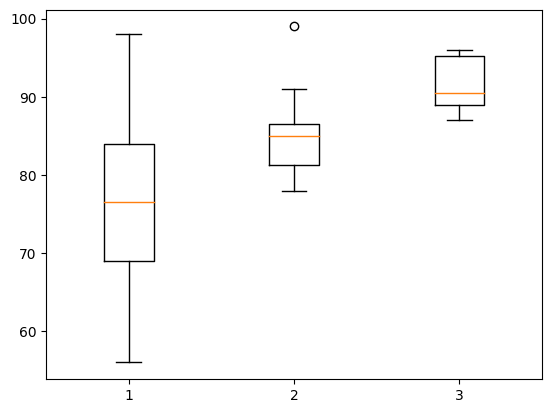

In [ ]:
import matplotlib.pyplot as plt
# 상자 그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

## 정규성 검정

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.9773513078689575, pvalue=0.9494335651397705) 0.07595650731608801 0.24489809048639932
ShapiroResult(statistic=0.9014081358909607, pvalue=0.22701990604400635) 1.2318799025805836 1.8758654720568746
ShapiroResult(statistic=0.8640847206115723, pvalue=0.08523961901664734) 0.3653252227728031 -1.5498131476133814


## 정규성 가지지 않는 경우

In [ ]:
# 비모수 통계
# Kruskal-Wallis test
from scipy.stats import kruskal
kruskal(x1, x2, x3)
# 차이가 있음

KruskalResult(statistic=12.639647085101634, pvalue=0.0018002611476946523)

## 등분산 검정

In [ ]:
# 바틀렛 - 정규성 만족
from scipy.stats import bartlett
bartlett(x1, x2, x3)

BartlettResult(statistic=12.27855807211073, pvalue=0.002156477800717272)

In [ ]:
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=3.2688342585249797, pvalue=0.05354477520716655)

In [ ]:
# 플리그너 - 정규성 만족 안함, 더 안정적 결과
from scipy.stats import fligner
fligner(x1, x2, x3)

FlignerResult(statistic=4.520920772927577, pvalue=0.10430245426123703)

## 등분산 가정

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)

F_onewayResult(statistic=8.799125632765763, pvalue=0.0011418790660784205)

## 사후검정

In [ ]:
# 사후 검정 = 개별 그룹 간 차이 확인
# 등분산 가정하면 Tukey, Duncan, Scheffe 사용 가능함
# statsmodels의 Tukey test를 하기 위해서는 dataframe의 형태를 변경해줘야 함
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) + ["group2"] * len(x2) + ["group3"] * len(x3),
                    "score": x1 + x2 + x3})
data.head()

,group,score
0,group1,87
1,group1,86
2,group1,76
3,group1,56
4,group1,78


In [ ]:
# 사후검정 Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data['score'], data['group'], alpha=0.05)
print(posthoc)
# 집단1과 집단3의 차이가 있다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2      8.6 0.0596 -0.2973 17.4973  False
group1 group3     15.0 0.0008  6.1027 23.8973   True
group2 group3      6.4 0.1941 -2.4973 15.2973  False
----------------------------------------------------


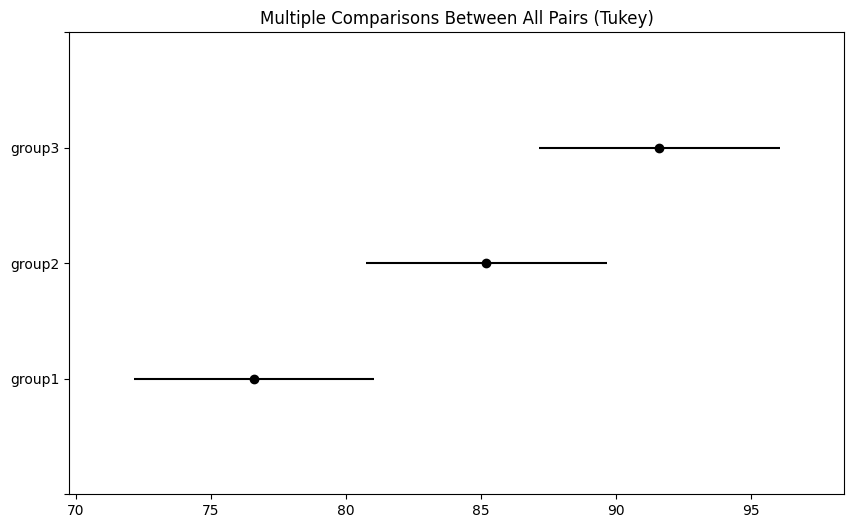

In [ ]:
fig = posthoc.plot_simultaneous()
# 그룹 1과 3은 겹치지 않아서 차이가 있음
# 집단1과 집단3의 차이가 있다.

## 이분산가정

In [ ]:
!pip install pingouin

In [ ]:
# 등분산 가정할 수 없으면 Welch’s ANOVA
from pingouin import welch_anova
welch_anova(dv='score', between='group', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,15.249013,9.678883,0.001933,0.394595


## 사후검정

In [ ]:
# 등분산 가정할 수 없으면 사후검정도 다른 것을 사용해야 함
# Tamhane' T2, Dunnett's T3, Games-Howell, Dunnett's C 등의 방법
# 보편적으로 Games-Howell
from pingouin import pairwise_gameshowell
pairwise_gameshowell(dv = 'score', between = 'group', data = data)
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,group1,group2,76.6,85.2,-8.6,4.260934,-2.018337,13.504224,0.145588,-0.864489
1,group1,group3,76.6,91.6,-15.0,3.933898,-3.813012,10.449039,0.008094,-1.633179
2,group2,group3,85.2,91.6,-6.4,2.236068,-2.862167,13.982798,0.031630,-1.225915


# 문제 풀이

## 문제2

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import f

In [ ]:
# 문제2
# x1: 집단1(평균연습15시간미만)
# x2: 집단2(평균연습15~25시간)
# x3: 집단3(평균연습25시간이상)
# 100야드자유형시간기록
x1 = [58.7, 55.3, 61.8, 49.5, 64.5, 61, 65.7, 51.4, 53.6, 59]
x2 = [64.4, 55.8, 58.7, 54.7, 52.7, 67.8, 61.6, 58.7, 54.6, 51.5, 54.7, 61.4, 56.9]
x3 = [68, 65.9, 54.7, 53.6, 58.7, 58.7, 65.7, 66.5, 56.7, 55.4, 51.5, 54.8, 57.2]

In [ ]:
# 그룹평균
x1_m = np.mean(x1);x2_m = np.mean(x2);x3_m = np.mean(x3)
print(x1_m, x2_m, x3_m)

58.05 57.96153846153846 59.03076923076923


In [ ]:
# 총평균
t_m = np.mean(x1 + x2 + x3);t_m

58.37222222222223

In [ ]:
# 표본크기
n1 = len(x1);n2 = len(x2);n3 = len(x3)
print(n1, n2, n3)

10 13 13


In [ ]:
# 분산분석표
# between
# 그룹간 변동 = 그룹평균 - 총평균
b1 = x1_m - t_m
b2 = x2_m - t_m
b3 = x3_m - t_m
print(b1, b2, b3)

-0.32222222222222996 -0.4106837606837672 0.6585470085470035


In [ ]:
# 그룹간 변동 제곱
b12 = b1 ** 2
b22 = b2 ** 2
b32 = b3 ** 2
print(b12, b22, b32)

0.10382716049383214 0.1686611512893618 0.43368416246620717


In [ ]:
# 그룹간 변동 제곱합 = SSB
ssb = sum([b12*n1, b22*n2, b32*n3]);ssb

8.86876068376072

In [ ]:
# within
# 그룹내 변동 = 관측치 - 그룹평균
w1 = x1 - x1_m
w2 = x2 - x2_m
w3 = x3 - x3_m
print(w1, w2, w3)

[ 0.65 -2.75  3.75 -8.55  6.45  2.95  7.65 -6.65 -4.45  0.95] [ 6.43846154 -2.16153846  0.73846154 -3.26153846 -5.26153846  9.83846154
  3.63846154  0.73846154 -3.36153846 -6.46153846 -3.26153846  3.43846154
 -1.06153846] [ 8.96923077  6.86923077 -4.33076923 -5.43076923 -0.33076923 -0.33076923
  6.66923077  7.46923077 -2.33076923 -3.63076923 -7.53076923 -4.23076923
 -1.83076923]


In [ ]:
# 그룹내 변동 제곱
w12 = w1 ** 2
w22 = w2 ** 2
w32 = w3 ** 2
print(w12, w22, w32)

[ 0.4225  7.5625 14.0625 73.1025 41.6025  8.7025 58.5225 44.2225 19.8025
  0.9025] [41.45378698  4.67224852  0.54532544 10.63763314 27.68378698 96.79532544
 13.23840237  0.54532544 11.29994083 41.75147929 10.63763314 11.82301775
  1.12686391] [80.44710059 47.18633136 18.75556213 29.49325444  0.10940828  0.10940828
 44.47863905 55.78940828  5.43248521 13.18248521 56.71248521 17.89940828
  3.35171598]


In [ ]:
# 그룹내 변동 제곱합 = SSW
ssw = sum(w12) + sum(w22 + w32);ssw

914.0634615384616

In [ ]:
# 자유도
# between => k - 1
# 분자 자유도 = df1
k = 3;df1 = k -1;df1

2

In [ ]:
# within => n - k
# 분모 자유도 = df2
n = n1 + n2 + n3;df2 = n - k;df2

33

In [ ]:
# 총 제곱합 SST = SSB + SSW
sst = ssb + ssw;sst

922.9322222222223

In [ ]:
# 전체 자유도 n - 1 = k - 1 + n - k
n - 1
k - 1 + n - k

35

In [ ]:
# 평균제곱합
# between => MSB = SSB / df1 = k - 1
# msb = ssb / (k - 1);msb
msb = ssb / df1;msb

4.43438034188036

In [ ]:
# within => MSW = SSW / df2 = n - k
# msw = ssw / (n - k);msw
msw = ssw / df2;msw

27.698892773892776

In [ ]:
# F 검정통계량 = MSB / MSW
fv = msb / msw;fv

0.1600923321404358

In [ ]:
# 임계값, 유의수준, 우측검정만 고려
alpha = 0.05
cv = f.ppf(1 - alpha, df1, df2);cv

3.2849176510382883

In [ ]:
# 결론
cv < fv
# 연습시간에 따른 그룹에서는 자유형 시간 기록에 차이가 없다.

False

In [ ]:
# 유의확률
pv = 1 - f.cdf(fv, df1, df2);pv

0.8527228755700839

In [ ]:
# 결론
alpha > pv
# 연습시간에 따른 그룹에서는 자유형 시간 기록에 차이가 없다.

False

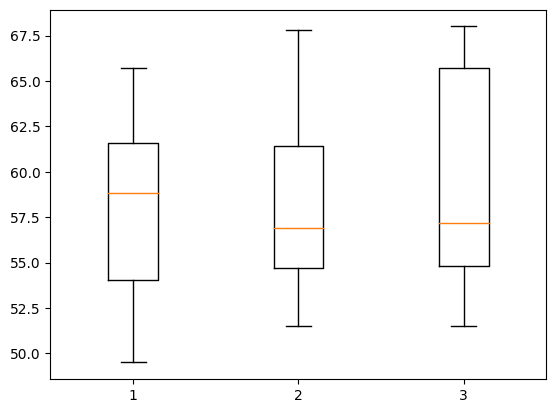

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.960749626159668, pvalue=0.7943859100341797) -0.19768159594076745 -1.1172223725837256
ShapiroResult(statistic=0.946773111820221, pvalue=0.5502951741218567) 0.7062121885393362 -0.09828735885810769
ShapiroResult(statistic=0.8846263289451599, pvalue=0.0824035182595253) 0.5389063816164447 -1.2490771859424863


In [ ]:
# 등분산 검정
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=0.14772950099612533, pvalue=0.8632317460123762)

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)

F_onewayResult(statistic=0.16009233214043544, pvalue=0.8527228755700833)

## 문제3

In [ ]:
# 문제3
# x1: 컬러
# x2: 흑백
# x3: 조합(컬러와 흑백)
# 제품의 매력도
x1 = [10, 8, 7, 8, 9, 6, 7, 6, 6, 7, 8, 7, 6, 5, 6, 7, 7]
x2 = [4, 5, 4, 3, 3, 4, 5, 6, 5, 7, 6, 5, 4, 5, 4, 4, 3]
x3 = [9, 8, 8, 9, 8, 7, 8, 9, 9, 10, 10, 9, 8, 9, 10, 10, 8]

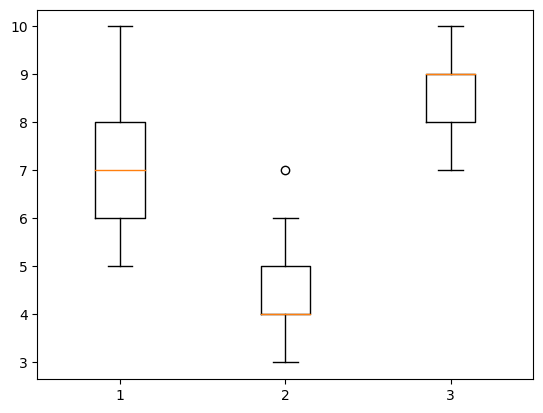

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.9188281893730164, pvalue=0.14108505845069885) 0.7495616018005272 0.6767838071504872
ShapiroResult(statistic=0.9141926765441895, pvalue=0.11777079105377197) 0.5149156862392628 -0.027845167271885796
ShapiroResult(statistic=0.8779568076133728, pvalue=0.029467137530446053) -0.05384913678331715 -0.7748721694667631


In [ ]:
# 등분산 검정
# 바틀렛 - 정규성 만족
from scipy.stats import bartlett
bartlett(x1, x2, x3)

BartlettResult(statistic=1.6225370294235317, pvalue=0.444294114987132)

In [ ]:
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=0.29149797570850183, pvalue=0.7484566821902545)

In [ ]:
# 플리그너 - 정규성 만족 안함, 더 안정적 결과
from scipy.stats import fligner
fligner(x1, x2, x3)

FlignerResult(statistic=0.6733004589700047, pvalue=0.7141585878400005)

In [ ]:
# 분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)
# 3가지 형태의 샘플 제품의 매력이 유의하게 다르다, 어느 제품 간의 차이가 있는지 모른다.

F_onewayResult(statistic=63.628282828282835, pvalue=3.1739974229954e-14)

In [ ]:
# 사후 검정 = 개별 그룹 간 차이 확인
# 등분산 가정하면 Tukey, Duncan, Scheffe 사용 가능함
# statsmodels의 Tukey test를 하기 위해서는 dataframe의 형태를 변경해줘야 함
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) + ["group2"] * len(x2) + ["group3"] * len(x3),
                    "attractiveness": x1 + x2 + x3})
data.head()

,group,attractiveness
0,group1,10
1,group1,8
2,group1,7
3,group1,8
4,group1,9


In [ ]:
# 사후검정 Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data['attractiveness'], data['group'], alpha=0.05)
print(posthoc)
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2  -2.5294    0.0 -3.4431 -1.6157   True
group1 group3   1.7059 0.0001  0.7922  2.6196   True
group2 group3   4.2353    0.0  3.3216   5.149   True
----------------------------------------------------


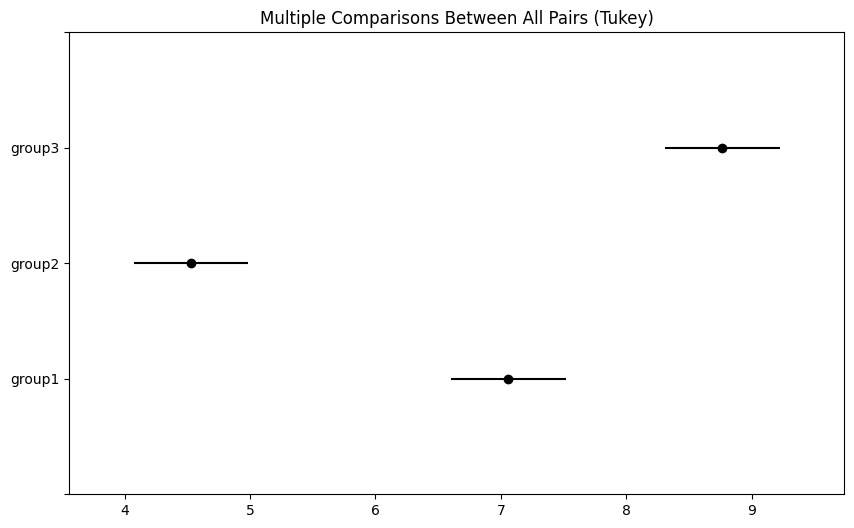

In [ ]:
fig = posthoc.plot_simultaneous()
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

## 문제4

In [ ]:
# 문제4
# x1: 고등학교1
# x2: 고등학교2
# x3: 고등학교3
# x4: 고등학교4
# x5: 고등학교5
# 졸업율
x1 = [67, 68, 65, 68, 67, 71, 78, 76, 72, 77]
x2 = [82, 87, 83, 73, 77, 74, 76, 78, 76, 86]
x3 = [94, 78, 81, 76, 75, 81, 79, 89, 76, 77]
x4 = [65, 65, 45, 57, 68, 76, 77, 72, 69, 58]
x5 = [88, 87, 86, 88, 89, 87, 81, 78, 89, 87]

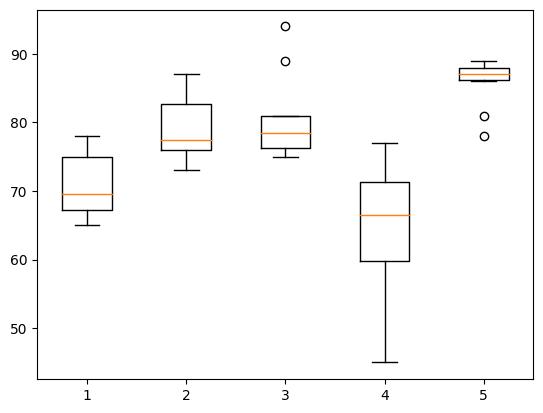

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3, x4, x5]
plt.boxplot(plot_x)
plt.show()

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))
print(shapiro(x3), skew(x4, bias = False), kurtosis(x4, bias = False))
print(shapiro(x3), skew(x5, bias = False), kurtosis(x5, bias = False))

ShapiroResult(statistic=0.8968305587768555, pvalue=0.20215274393558502) 0.4697201551037751 -1.4120017493819839
ShapiroResult(statistic=0.9172374606132507, pvalue=0.3344894051551819) 0.4648977729982741 -1.2599416452710201
ShapiroResult(statistic=0.8128599524497986, pvalue=0.020768487825989723) 1.4892194216702697 1.4536902831632883
ShapiroResult(statistic=0.8128599524497986, pvalue=0.020768487825989723) -0.8862183684565436 0.758040440125622
ShapiroResult(statistic=0.8128599524497986, pvalue=0.020768487825989723) -1.650012980385554 1.9048405630565934


In [ ]:
# 등분산 검정
# 바틀렛 - 정규성 만족
from scipy.stats import bartlett
bartlett(x1, x2, x3, x4, x5)

BartlettResult(statistic=10.307828160654301, pvalue=0.03554962166506024)

In [ ]:
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3, x4, x5)

LeveneResult(statistic=1.8423688493802433, pvalue=0.13732941328780138)

In [ ]:
# 플리그너 - 정규성 만족 안함, 더 안정적 결과
from scipy.stats import fligner
fligner(x1, x2, x3, x4, x5)

FlignerResult(statistic=7.746810003176652, pvalue=0.10130574771159925)

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3, x4, x5)
# 지난 10년 동안 5개 고등학교의 졸업율 사이에 유의한 차이가 있다.
# 어느 고등학교 간의 차이가 있는지 모른다.

F_onewayResult(statistic=17.728106082444505, pvalue=8.386659105696753e-09)

In [ ]:
# 사후 검정 = 개별 그룹 간 차이 확인
# 등분산 가정하면 Tukey, Duncan, Scheffe 사용 가능함
# statsmodels의 Tukey test를 하기 위해서는 dataframe의 형태를 변경해줘야 함
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) +
                              ["group2"] * len(x2) +
                              ["group3"] * len(x3) +
                              ["group4"] * len(x4) +
                              ["group5"] * len(x5),
                    "grad": x1 + x2 + x3 + x4 + x5})
data.head()

,group,grad
0,group1,67
1,group1,68
2,group1,65
3,group1,68
4,group1,67


In [ ]:
# 사후검정 Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data['grad'], data['group'], alpha=0.05)
print(posthoc)
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단1과 집단5의 차이가 있다.
# 집단2과 집단4의 차이가 있다.
# 집단3과 집단4의 차이가 있다.
# 집단4과 집단5의 차이가 있다.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
group1 group2      8.3 0.0348   0.4107 16.1893   True
group1 group3      9.7 0.0091   1.8107 17.5893   True
group1 group4     -5.7 0.2583 -13.5893  2.1893  False
group1 group5     15.1    0.0   7.2107 22.9893   True
group2 group3      1.4 0.9865  -6.4893  9.2893  False
group2 group4    -14.0 0.0001 -21.8893 -6.1107   True
group2 group5      6.8  0.121  -1.0893 14.6893  False
group3 group4    -15.4    0.0 -23.2893 -7.5107   True
group3 group5      5.4 0.3093  -2.4893 13.2893  False
group4 group5     20.8    0.0  12.9107 28.6893   True
-----------------------------------------------------


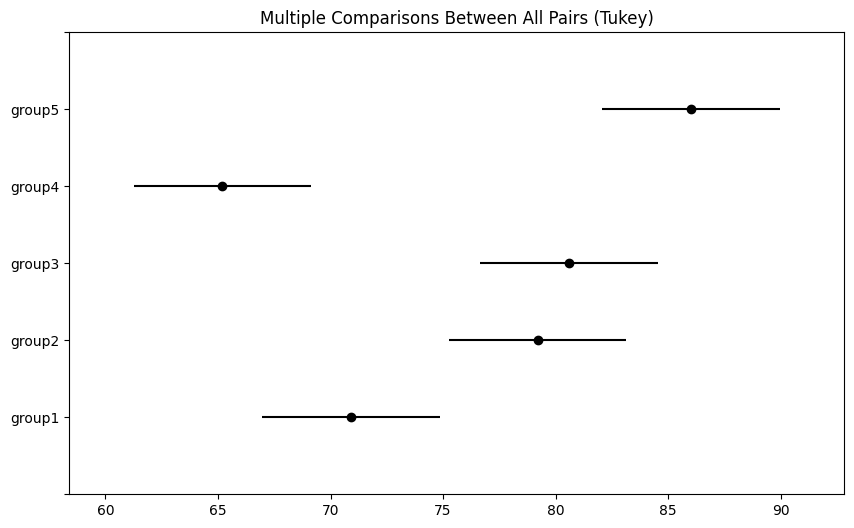

In [ ]:
fig = posthoc.plot_simultaneous()
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단1과 집단5의 차이가 있다.
# 집단2과 집단4의 차이가 있다.
# 집단3과 집단4의 차이가 있다.
# 집단4과 집단5의 차이가 있다.

## 문제5

In [ ]:
# 문제5
# x1: 봄
# x2: 여름
# x3: 가을
# x4: 겨울
# 매장의 평균 매출액
x1 = [67480, 68719, 50981, 65634, 57839]
x2 = [67282, 64741, 64963, 59487, 74481]
x3 = [64866, 55848, 74985, 71215, 67414]
x4 = [51382, 70963, 71475, 64265, 74796]

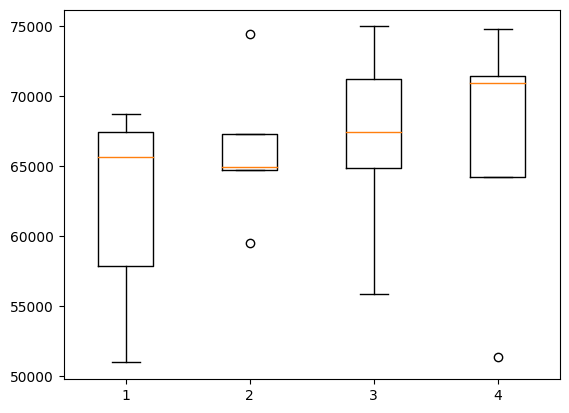

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3, x4]
plt.boxplot(plot_x)
plt.show()

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))
print(shapiro(x3), skew(x4, bias = False), kurtosis(x4, bias = False))

ShapiroResult(statistic=0.8777344822883606, pvalue=0.29917067289352417) -0.9579087137535165 -0.7644135205978531
ShapiroResult(statistic=0.9446653723716736, pvalue=0.6990814805030823) 0.6847627670214902 1.6207468314682352
ShapiroResult(statistic=0.964752733707428, pvalue=0.8406270146369934) -0.7940606121776813 0.7788471045676708
ShapiroResult(statistic=0.964752733707428, pvalue=0.8406270146369934) -1.4246465128396792 1.772286752135149


In [ ]:
# 등분산 검정
# 바틀렛 - 정규성 만족
from scipy.stats import bartlett
bartlett(x1, x2, x3, x4)

BartlettResult(statistic=1.0113581431636154, pvalue=0.7985036481500989)

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3, x4)
# 판매 시즌 간에 실적의 차이는 없다.

F_onewayResult(statistic=0.43819818189128323, pvalue=0.7287528736222224)